In [120]:
import numpy as np              
import matplotlib.pyplot as plt
%matplotlib inline    
import pandas as pd             
import seaborn as sns           
import sklearn                  

## Задача

Покупатель, располагая некоторым количеством денежных средств, выбирает автомобиль на аукционе. Предлагается упростить задачу поиска - отсеять варианты, ориентировочная стоимость которых превышает бюджет мероприятия, чтобы из оставшихся выбрать оптимальный. (Классификация: больше требуемой суммы/ меньше требуемой суммы)

## Загрузка данных

In [121]:
data_raw = pd.read_csv('car_ad.csv')

In [122]:
data_raw.shape

(9576, 10)

In [123]:
data_raw.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [124]:
data_raw.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [125]:
data_raw.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [126]:
data_raw.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [127]:
data_raw.index

RangeIndex(start=0, stop=9576, step=1)

In [128]:
data_raw['car'].dtype

dtype('O')

In [129]:
data_raw['price'].dtype

dtype('float64')

In [130]:
data_raw['year'].dtype

dtype('int64')

In [131]:
data_raw['car'] = data_raw['car'].astype('category')

In [132]:
data_raw['car'].dtype

CategoricalDtype(categories=['Acura', 'Alfa Romeo', 'Aro', 'Aston Martin', 'Audi', 'BMW',
                  'BYD', 'Barkas', 'Bentley', 'Bogdan', 'Buick', 'Cadillac',
                  'Changan', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen',
                  'Dacia', 'Dadi', 'Daewoo', 'Daihatsu', 'Dodge', 'FAW',
                  'Ferrari', 'Fiat', 'Fisker', 'Ford', 'GAZ', 'GMC', 'Geely',
                  'Great Wall', 'Groz', 'Hafei', 'Honda', 'Huanghai', 'Hummer',
                  'Hyundai', 'Infiniti', 'Isuzu', 'JAC', 'Jaguar', 'Jeep',
                  'Kia', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus',
                  'Lifan', 'Lincoln', 'MG', 'MINI', 'Maserati', 'Mazda',
                  'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Moskvich-AZLK',
                  'Moskvich-Izh', 'Nissan', 'Opel', 'Other-Retro', 'Peugeot',
                  'Porsche', 'Renault', 'Rolls-Royce', 'Rover', 'SMA', 'Saab',
                  'Samand', 'Samsung', 'Seat', 'Skoda', 'Smart', 'SsangYo

In [133]:
data_raw['body'].dtype

dtype('O')

In [134]:
data_raw['body']

0       crossover
1           sedan
2           other
3             van
4           vagon
5       crossover
6           sedan
7           vagon
8           sedan
9           sedan
10      crossover
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17      crossover
18      crossover
19          sedan
20      crossover
21      crossover
22      crossover
23      crossover
24      crossover
25      crossover
26      crossover
27      crossover
28      crossover
29      crossover
          ...    
9546        sedan
9547        sedan
9548    crossover
9549        vagon
9550        sedan
9551          van
9552          van
9553        sedan
9554        sedan
9555        hatch
9556        other
9557        other
9558        hatch
9559        sedan
9560        other
9561        other
9562        sedan
9563        vagon
9564          van
9565        hatch
9566          van
9567    crossover
9568        vagon
9569    crossover
9570    cr

In [135]:
data_raw['body'] = data_raw['body'].astype('category')

In [136]:
data_raw['body'].dtype

CategoricalDtype(categories=['crossover', 'hatch', 'other', 'sedan', 'vagon', 'van'], ordered=False)

In [137]:
data_raw['engType'].dtype

dtype('O')

In [138]:
data_raw['engType'] = data_raw['engType'].astype('category')

In [139]:
data_raw['engType'].dtype

CategoricalDtype(categories=['Diesel', 'Gas', 'Other', 'Petrol'], ordered=False)

In [140]:
data_raw['registration'].dtype

dtype('O')

In [141]:
data_raw['registration'] = data_raw['registration'].astype('category')

In [142]:
data_raw['registration'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [143]:
data_raw['drive'].dtype

dtype('O')

In [144]:
data_raw['drive'] = data_raw['drive'].astype('category')

In [145]:
data_raw['drive'].dtype

CategoricalDtype(categories=['front', 'full', 'rear'], ordered=False)

In [146]:
data_raw['model'].dtype

dtype('O')

In [147]:
data_raw['model'] = data_raw['model'].astype('category')

In [148]:
data_raw['model'].dtype

CategoricalDtype(categories=['1 Series', '1.3', '10', '100', '106', '107', '11',
                  '1102 Таврия', '1103 Славута', '110557',
                  ...
                  'ZDX', 'Zafira', 'i10', 'i20', 'i30', 'ix55 (Veracruz)',
                  'Классические', 'Патриот', 'Приора', 'Таврия-Нова'],
                 ordered=False)

# Работа с элементами таблицы

In [149]:
data_raw.at[2, 'car']

'Mercedes-Benz'

In [150]:
data_raw.loc[2, 'car']

'Mercedes-Benz'

In [151]:
data_raw.iat[2, 0]

'Mercedes-Benz'

In [152]:
data_raw.iloc[2, 0]

'Mercedes-Benz'

In [153]:
data_raw.loc[[2,3,5], ['car', 'model', 'year']]

,car,model,year
2,Mercedes-Benz,CL 550,2008
3,Mercedes-Benz,B 180,2012
5,Nissan,X-Trail,2013


In [154]:
data_raw.iloc[[2,3,5], [0,8,7]]

,car,model,year
2,Mercedes-Benz,CL 550,2008
3,Mercedes-Benz,B 180,2012
5,Nissan,X-Trail,2013


In [155]:
data_raw.loc[[2,3,5], ['car', 'model', 'year']].loc[5, 'car']

'Nissan'

In [156]:
data_raw.loc[:, ['car', 'model']]

,car,model
0,Ford,Kuga
1,Mercedes-Benz,E-Class
2,Mercedes-Benz,CL 550
3,Mercedes-Benz,B 180
4,Mercedes-Benz,E-Class
5,Nissan,X-Trail
6,Honda,Accord
7,Renault,Megane
8,Mercedes-Benz,E-Class
9,Mercedes-Benz,E-Class


In [157]:
data_raw.loc[[2, 5], :]

,car,price,body,mileage,engV,engType,registration,year,model,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [158]:
data_raw['car']

0                Ford
1       Mercedes-Benz
2       Mercedes-Benz
3       Mercedes-Benz
4       Mercedes-Benz
5              Nissan
6               Honda
7             Renault
8       Mercedes-Benz
9       Mercedes-Benz
10             Nissan
11      Mercedes-Benz
12      Mercedes-Benz
13                BMW
14      Mercedes-Benz
15                BMW
16                BMW
17      Mercedes-Benz
18             Nissan
19                BMW
20         Land Rover
21             Nissan
22                BMW
23                BMW
24                BMW
25                BMW
26      Mercedes-Benz
27                BMW
28                BMW
29      Mercedes-Benz
            ...      
9546              VAZ
9547       Mitsubishi
9548         Infiniti
9549            Skoda
9550              BMW
9551             Opel
9552             Fiat
9553              VAZ
9554              ZAZ
9555    Mercedes-Benz
9556          Citroen
9557       Volkswagen
9558        Chevrolet
9559           Toyota
9560      

In [159]:
data_raw.car

0                Ford
1       Mercedes-Benz
2       Mercedes-Benz
3       Mercedes-Benz
4       Mercedes-Benz
5              Nissan
6               Honda
7             Renault
8       Mercedes-Benz
9       Mercedes-Benz
10             Nissan
11      Mercedes-Benz
12      Mercedes-Benz
13                BMW
14      Mercedes-Benz
15                BMW
16                BMW
17      Mercedes-Benz
18             Nissan
19                BMW
20         Land Rover
21             Nissan
22                BMW
23                BMW
24                BMW
25                BMW
26      Mercedes-Benz
27                BMW
28                BMW
29      Mercedes-Benz
            ...      
9546              VAZ
9547       Mitsubishi
9548         Infiniti
9549            Skoda
9550              BMW
9551             Opel
9552             Fiat
9553              VAZ
9554              ZAZ
9555    Mercedes-Benz
9556          Citroen
9557       Volkswagen
9558        Chevrolet
9559           Toyota
9560      

In [160]:
data_raw[['car', 'model']]

,car,model
0,Ford,Kuga
1,Mercedes-Benz,E-Class
2,Mercedes-Benz,CL 550
3,Mercedes-Benz,B 180
4,Mercedes-Benz,E-Class
5,Nissan,X-Trail
6,Honda,Accord
7,Renault,Megane
8,Mercedes-Benz,E-Class
9,Mercedes-Benz,E-Class


In [161]:
df = data_raw.iloc[:4, 1:5]
df

,price,body,mileage,engV
0,15500.0,crossover,68,2.5
1,20500.0,sedan,173,1.8
2,35000.0,other,135,5.5
3,17800.0,van,162,1.8


In [162]:
df.iloc[[True, True, False, True], [False, True, True, False]]

,body,mileage
0,crossover,68
1,sedan,173
3,van,162


In [163]:
df.loc[[True, True, False, True]]

,price,body,mileage,engV
0,15500.0,crossover,68,2.5
1,20500.0,sedan,173,1.8
3,17800.0,van,162,1.8


In [164]:
df[[True, True, False, True]]

,price,body,mileage,engV
0,15500.0,crossover,68,2.5
1,20500.0,sedan,173,1.8
3,17800.0,van,162,1.8


In [165]:
df.loc[df.body == 'van', ]

,price,body,mileage,engV
3,17800.0,van,162,1.8


# Выбросы


Рассмотрим зависимость цены от пробега 

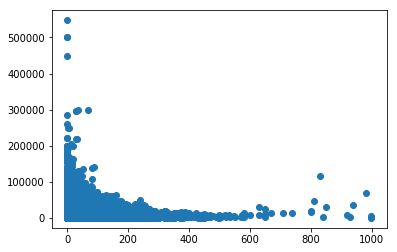

In [166]:
plt.scatter(data_raw['mileage'], data_raw['price'])
pass

In [167]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.0
0.010         0.0
0.050      1400.0
0.100      2500.0
0.500      9200.0
0.900     32500.0
0.950     51000.0
0.990    115000.0
0.995    154124.0
Name: price, dtype: float64

In [168]:
data_raw['mileage'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.00
0.010      0.00
0.050      1.00
0.100     16.00
0.500    128.00
0.900    265.00
0.950    305.00
0.990    409.25
0.995    470.00
Name: mileage, dtype: float64

In [169]:
data_raw['year'].quantile([.01,.05,.1,.5,.9,.95,.99,.995])
data_raw['engV'].quantile([.01,.05,.1,.5,.9,.95,.99,.995])

0.010     1.0
0.050     1.3
0.100     1.4
0.500     2.0
0.900     3.5
0.950     4.6
0.990     6.2
0.995    18.0
Name: engV, dtype: float64

In [170]:
rows_to_drop = data_raw[
    (data_raw['engV'] < data_raw['engV'].quantile(0.005)) | (data_raw['engV'] > data_raw['engV'].quantile(0.995)) |
    (data_raw['year'] < data_raw['year'].quantile(0.005)) | (data_raw['year'] > data_raw['year'].quantile(0.995)) |
    (data_raw['price'] < data_raw['price'].quantile(0.005)) | (data_raw['price'] > data_raw['price'].quantile(0.995)) | 
    (data_raw['mileage']  < data_raw['mileage' ].quantile(0.005)) | (data_raw['mileage']  > data_raw['mileage' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(9369, 10)

In [171]:
rows_to_drop

Int64Index([  39,   66,  183,  184,  240,  254,  256,  308,  334,  403,
            ...
            9251, 9303, 9342, 9389, 9413, 9439, 9469, 9508, 9542, 9545],
           dtype='int64', length=207)

In [172]:
data_raw.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [173]:
df1 = data_raw.iloc[rows_to_drop, 1:5]
df1

,price,body,mileage,engV
39,200000.000,van,19,3.50
66,195000.000,crossover,0,4.50
183,195000.000,crossover,0,4.50
184,4600.000,vagon,242,99.99
240,159600.000,sedan,0,NaN
254,1950.000,sedan,320,19.00
256,14000.000,crossover,171,99.99
308,17700.000,hatch,21,0.11
334,36000.000,crossover,940,NaN
403,15700.000,hatch,22,0.11


# Визуализация данных

In [174]:
data.describe()

,price,mileage,engV,year
count,9369.000000,9369.000000,8950.000000,9369.000000
mean,14677.036476,137.118369,2.258872,2006.763795
std,17851.334353,91.355915,1.052440,6.656353
min,0.000000,0.000000,0.800000,1979.000000
25%,5000.000000,70.000000,1.600000,2004.000000
50%,9299.000000,128.000000,2.000000,2008.000000
75%,16700.000000,193.000000,2.500000,2012.000000
max,153999.000000,470.000000,18.000000,2016.000000


In [175]:
data.describe(include=['category'])

,car,body,engType,registration,model,drive
count,9369,9369,9369,9369,9369,8879
unique,87,6,4,2,871,3
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,924,3572,4268,8816,196,5137


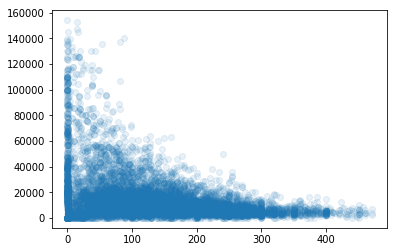

In [176]:
plt.scatter(data['mileage'], data['price'], alpha=0.1)
pass

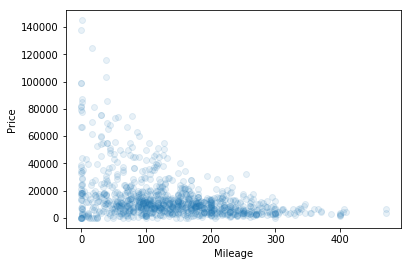

In [177]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['mileage'], data.iloc[random_subset]['price'], alpha=0.1)
plt.xlabel('Mileage')
plt.ylabel('Price')
pass

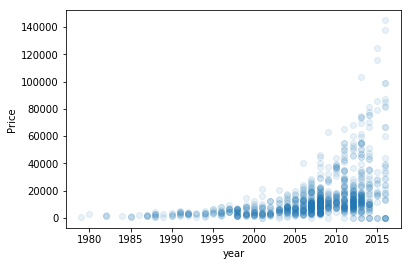

In [178]:
plt.scatter(data.iloc[random_subset]['year'], data.iloc[random_subset]['price'], alpha = 0.1)
plt.xlabel('year')
plt.ylabel('Price')
pass

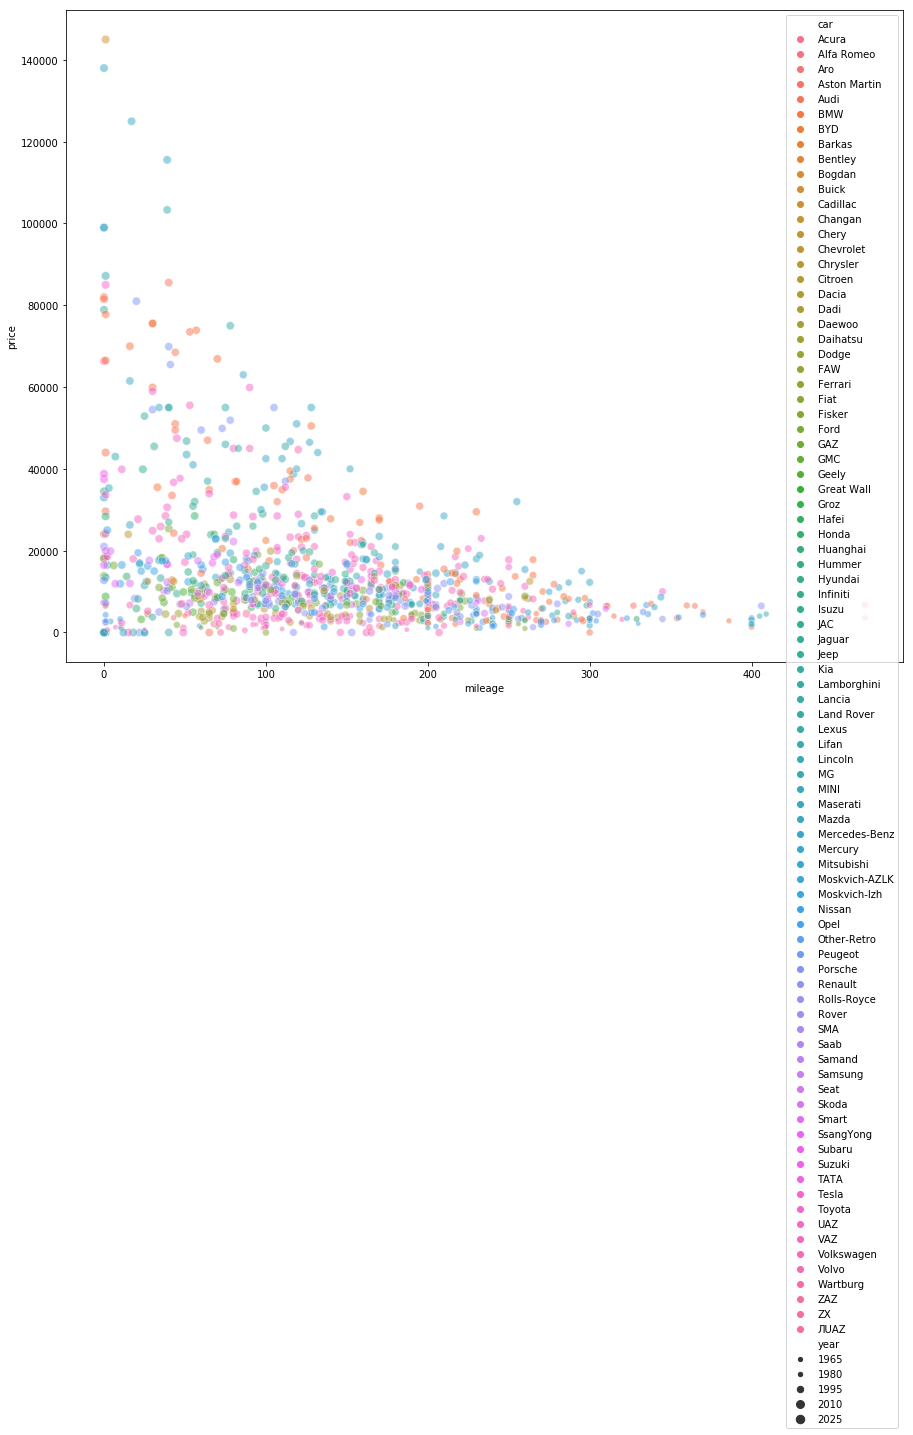

In [179]:
plt.figure(figsize = (15, 12))
sns.scatterplot(x='mileage', y='price', hue='car', size='year', data=data.iloc[random_subset], alpha=0.5)
pass

Можно видеть, что больший пробег ожидаемо чаще имеют автомобили более раннего года выпуска. Большую стоимость имеют автомобили с малым пробегом/ недавнего выпуска - дорогие ретро-экземпляры в виду географического расположения торговой площадки и самой их специфики практически отсутствуют в исходных данных (в противном случае они были бы устранены на этапе борьбы с выбросами). В верхней части ожидаемо оказались Cadillac, Infinity и т.д.

D:\Python\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Python\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


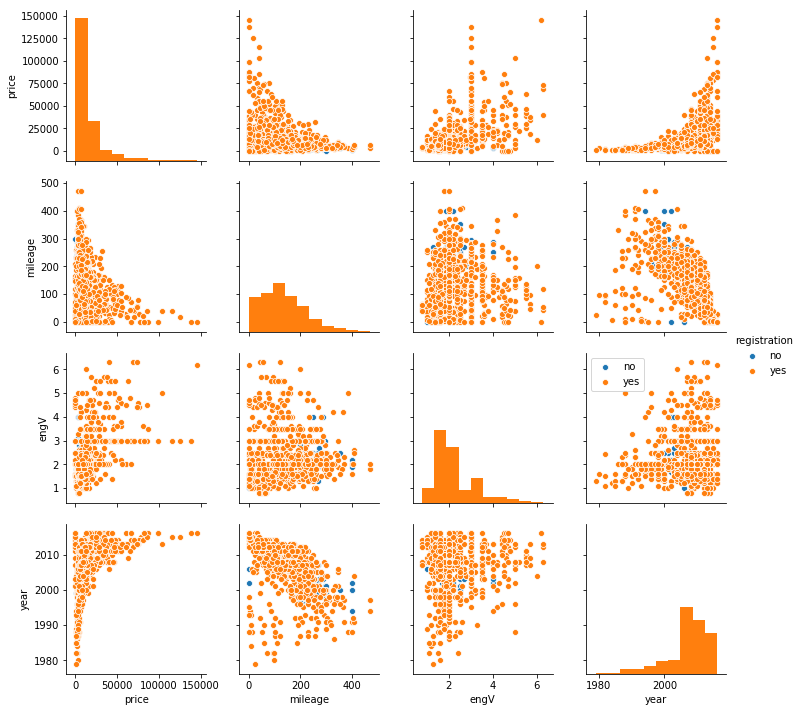

In [180]:
sns.pairplot(data.iloc[random_subset], hue = 'registration', diag_kind='hist')
plt.legend()
pass

Продаются преимущественно доступные варианты относительно недавнего выпуска. Видна явная корреляция между пробегом и годом

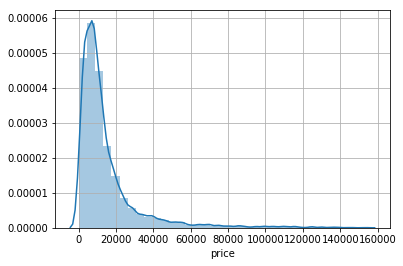

In [181]:
sns.distplot(data['price'], bins=35)
plt.grid()
pass

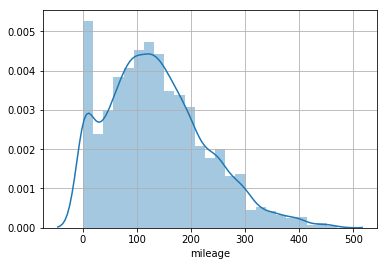

In [182]:
sns.distplot(data['mileage'], bins=25)
plt.grid()
pass

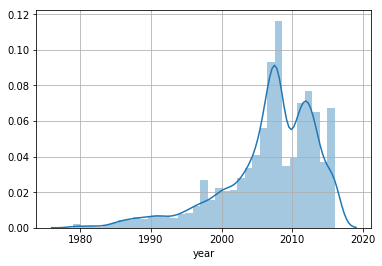

In [183]:
sns.distplot(data['year'], bins=35)
plt.grid()
pass

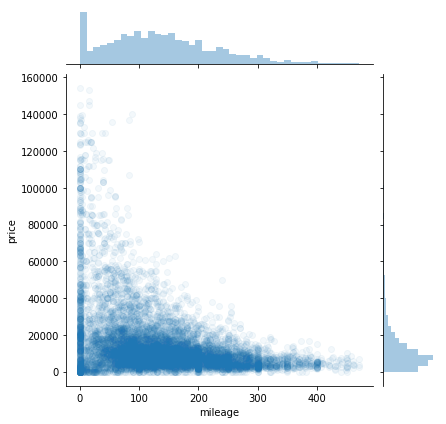

In [184]:
sns.jointplot(x='mileage', y='price', alpha=.05, data=data)
pass

### Бокс-диаграммы и скрипичные графики

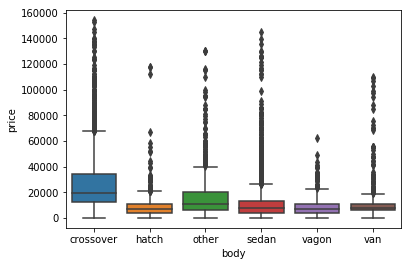

In [185]:
sns.boxplot(x="body", y="price", data=data)
pass

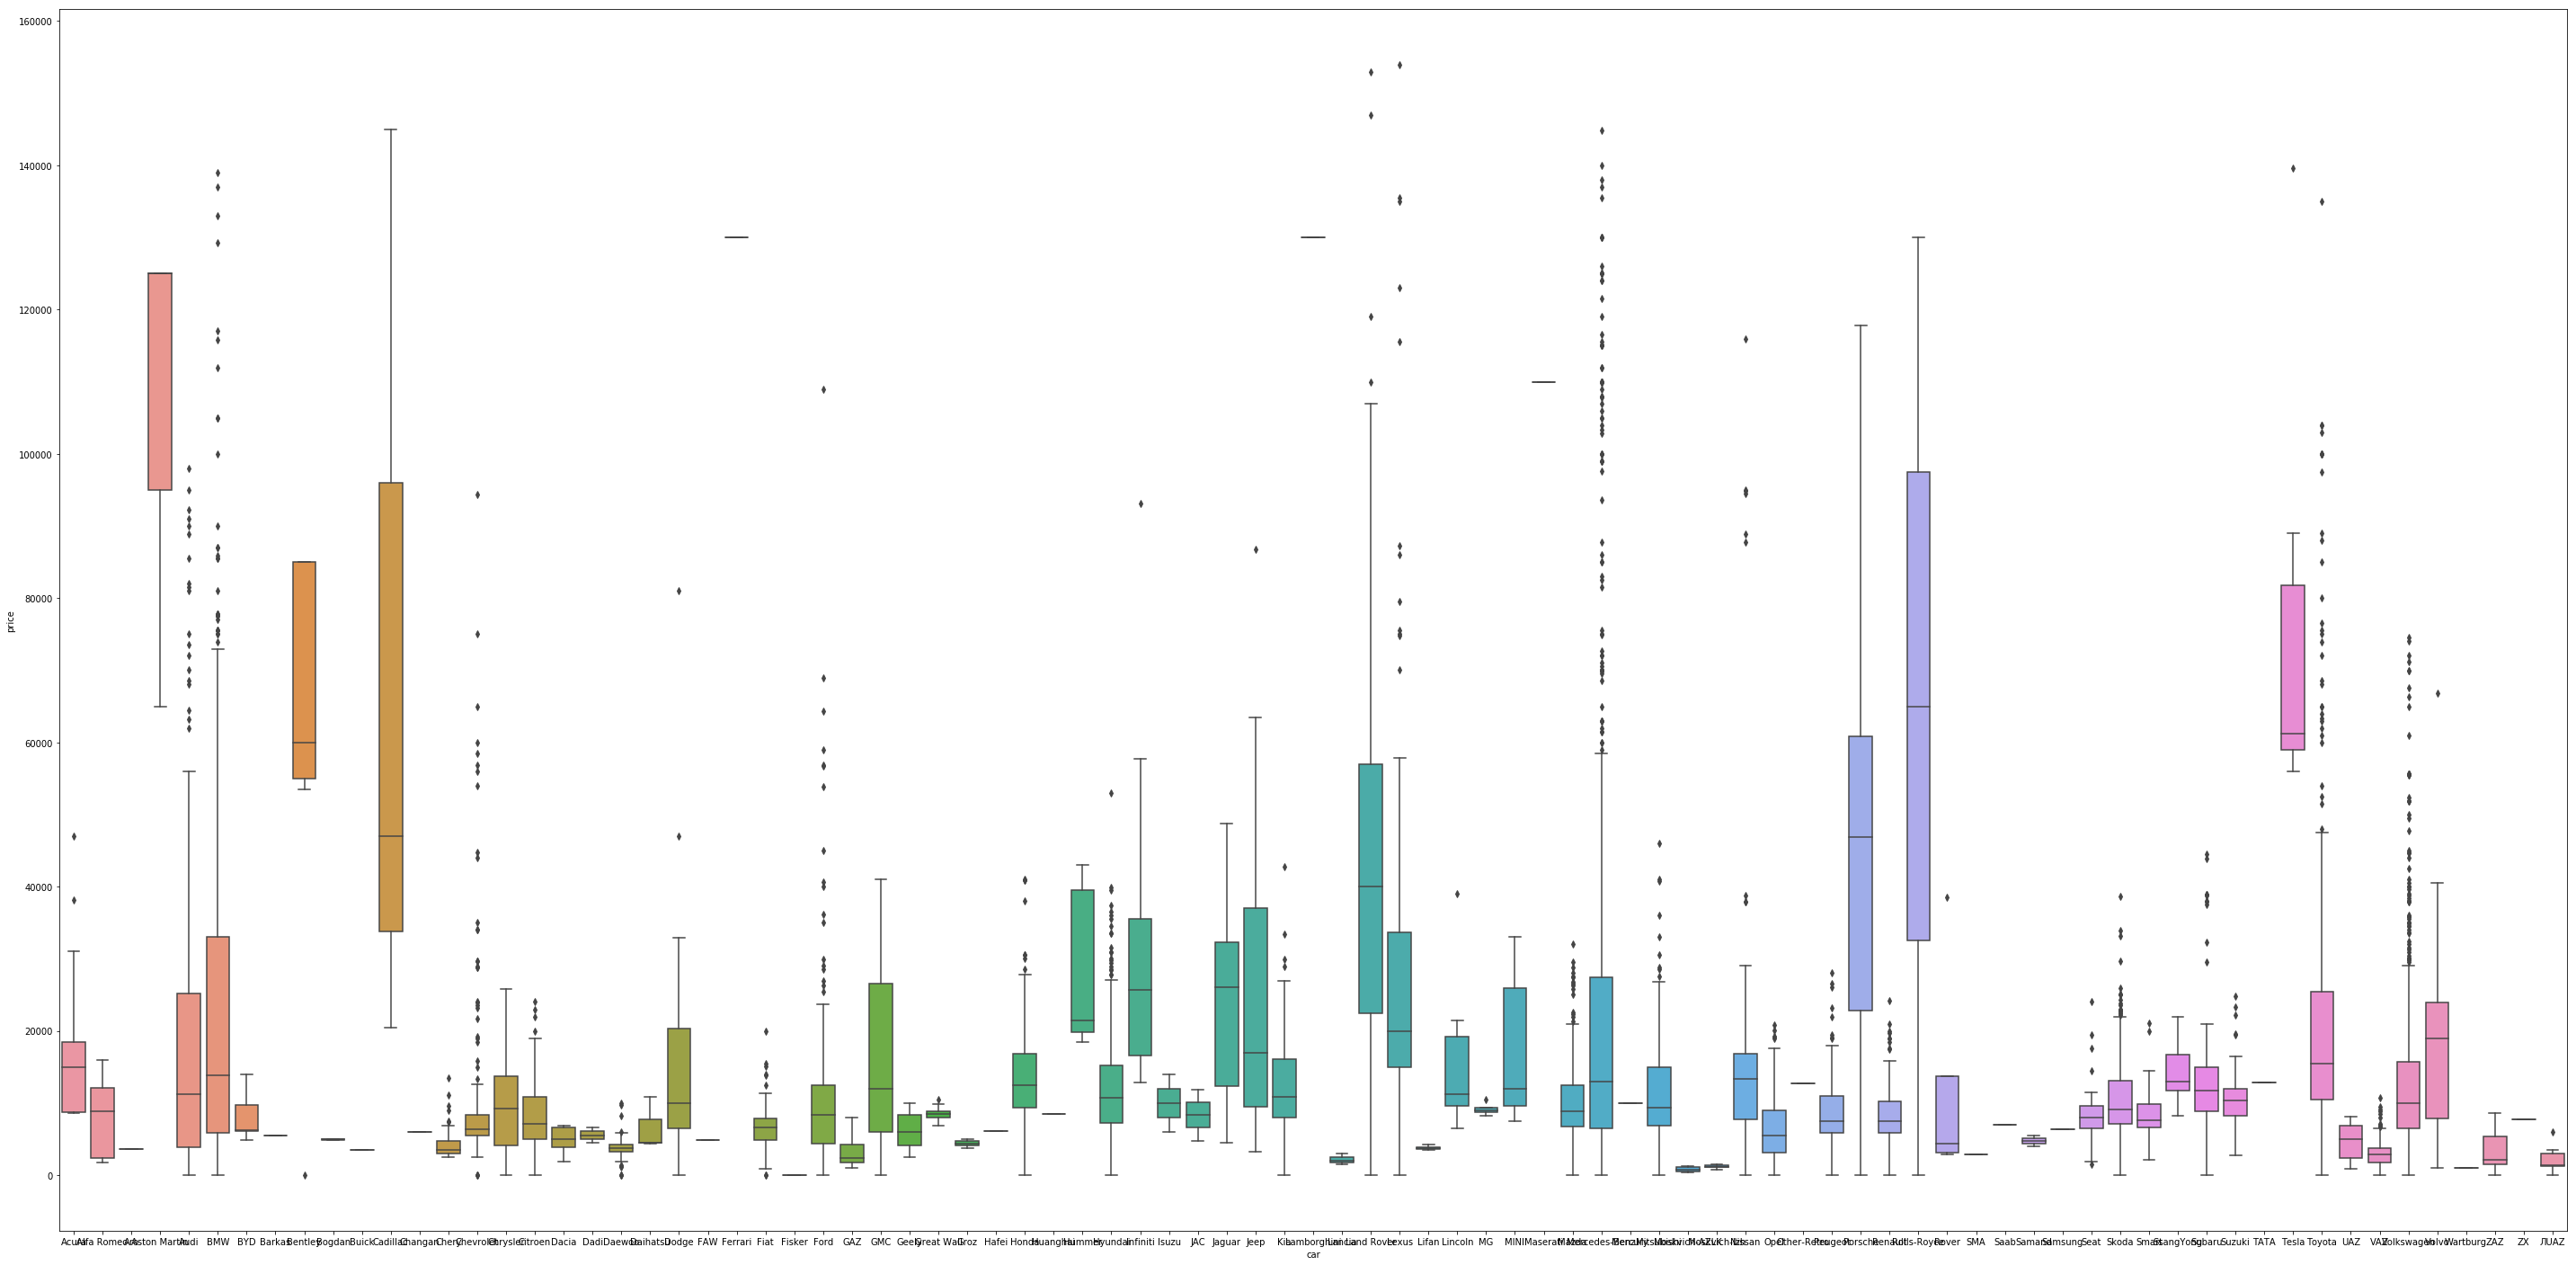

In [186]:
plt.figure(figsize = (50, 25))
sns.boxplot(x="car", y="price", data=data)
pass

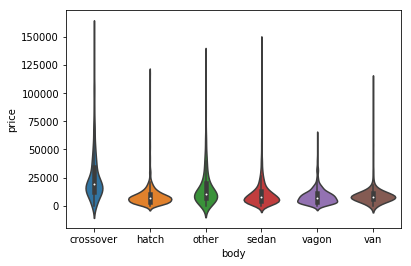

In [187]:
sns.violinplot(x="body", y="price", data=data)
pass

### Матрица корреляции

In [188]:
corr_mat = data.corr()
corr_mat

,price,mileage,engV,year
price,1.000000,-0.378783,0.428493,0.444192
mileage,-0.378783,1.000000,0.016009,-0.563714
engV,0.428493,0.016009,1.000000,0.040205
year,0.444192,-0.563714,0.040205,1.000000


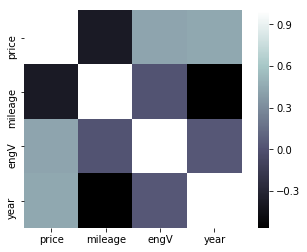

In [189]:
sns.heatmap(corr_mat, square=True, cmap='bone')
pass

In [190]:
corr_mat > 0.5

,price,mileage,engV,year
price,True,False,False,False
mileage,False,True,False,False
engV,False,False,True,False
year,False,False,False,True


In [191]:
corr_mat.loc['price', 'year']

0.4441921418937423

In [192]:
data['model'].unique()

[Kuga, E-Class, CL 550, B 180, X-Trail, ..., Nitro, CL 180, GS 250, Gran Move, 3962]
Length: 871
Categories (871, object): [Kuga, E-Class, CL 550, B 180, ..., CL 180, GS 250, Gran Move, 3962]

In [193]:
data['body'].value_counts()

sedan        3572
crossover    2029
hatch        1228
van          1032
other         794
vagon         714
Name: body, dtype: int64

In [194]:
data['registration'].value_counts()

yes    8816
no      553
Name: registration, dtype: int64

### Различные зависимости

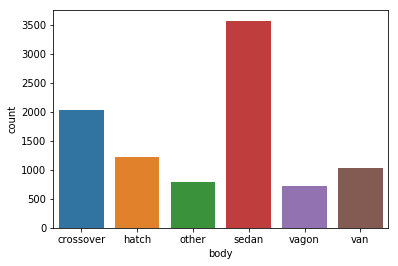

In [195]:
sns.countplot(x='body', data=data)
pass

In [196]:
data['car'].value_counts()

Volkswagen       924
Mercedes-Benz    879
BMW              687
Toyota           535
VAZ              468
Renault          461
Audi             454
Opel             399
Skoda            367
Hyundai          366
Nissan           363
Ford             343
Mitsubishi       325
Chevrolet        245
Daewoo           234
Kia              214
Honda            206
Mazda            197
Peugeot          179
Lexus            173
Land Rover       145
Fiat             118
Subaru           112
Citroen          107
ZAZ               97
Porsche           92
Infiniti          63
Suzuki            57
Geely             56
Chery             53
                ... 
Aston Martin       3
Cadillac           3
Lancia             3
GMC                3
Isuzu              2
Samand             2
Bogdan             2
Rolls-Royce        2
Dadi               2
JAC                2
Groz               2
Maserati           1
Hafei              1
Wartburg           1
Aro                1
Huanghai           1
TATA         

#### Количество/ Бренд 

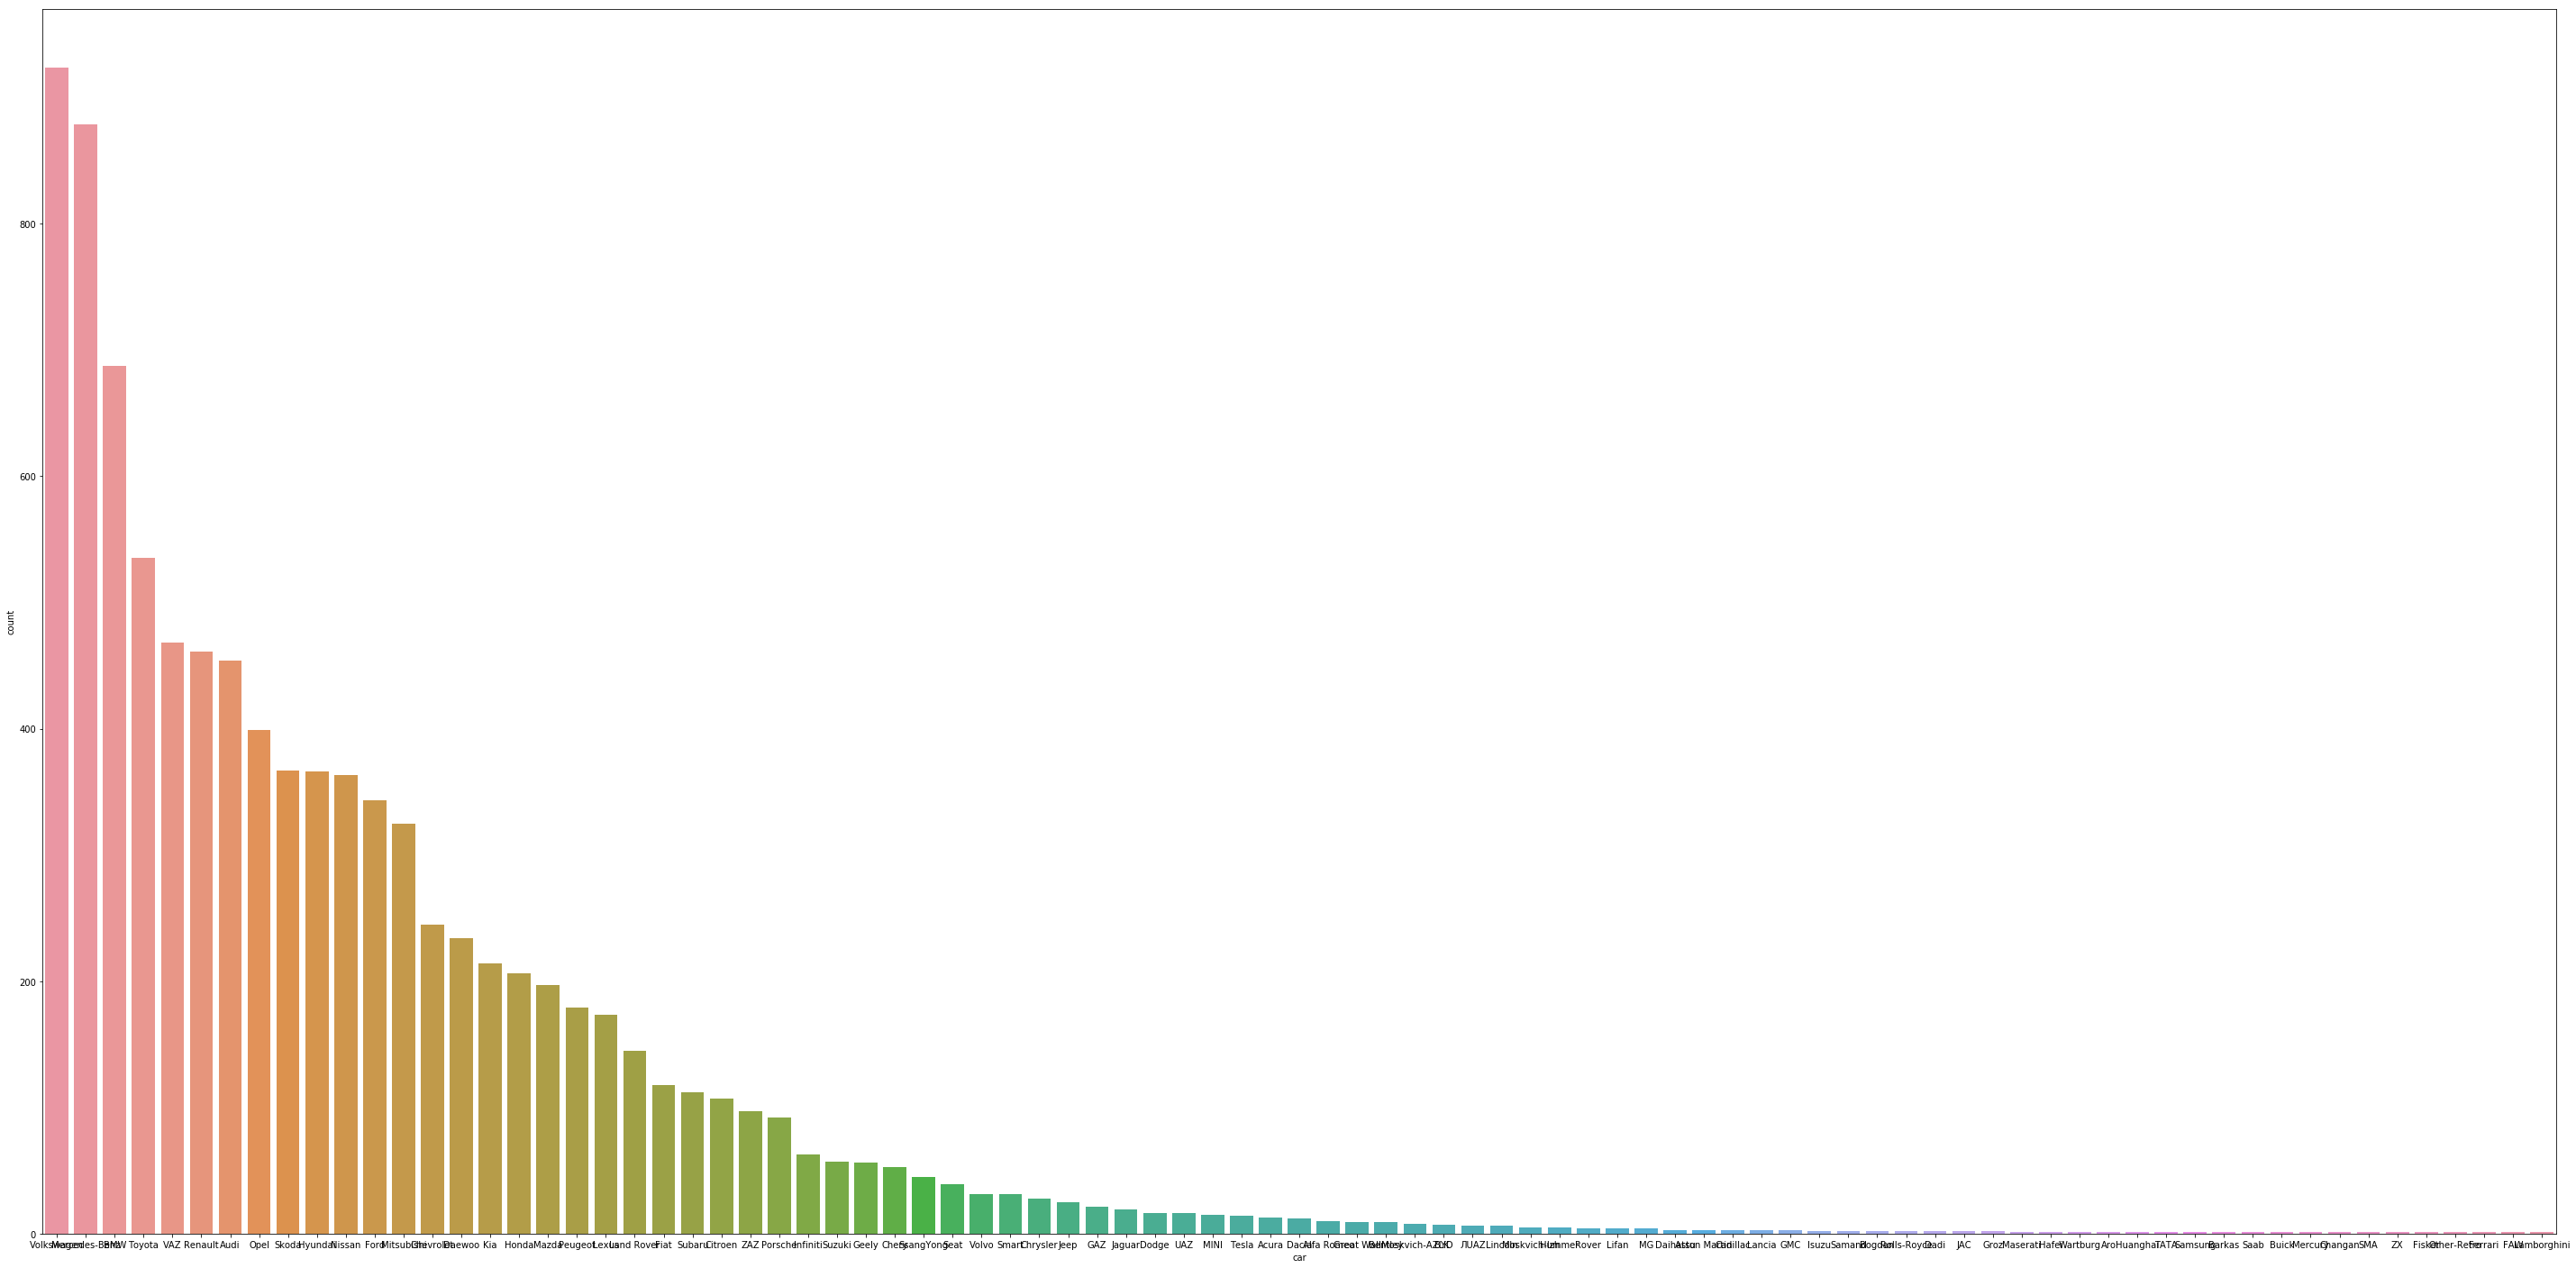

In [197]:
plt.figure(figsize = (50, 25))
sns.countplot(x='car', order=data['car'].value_counts().index, data=data)
pass

#### Тип кузова/ Бренд

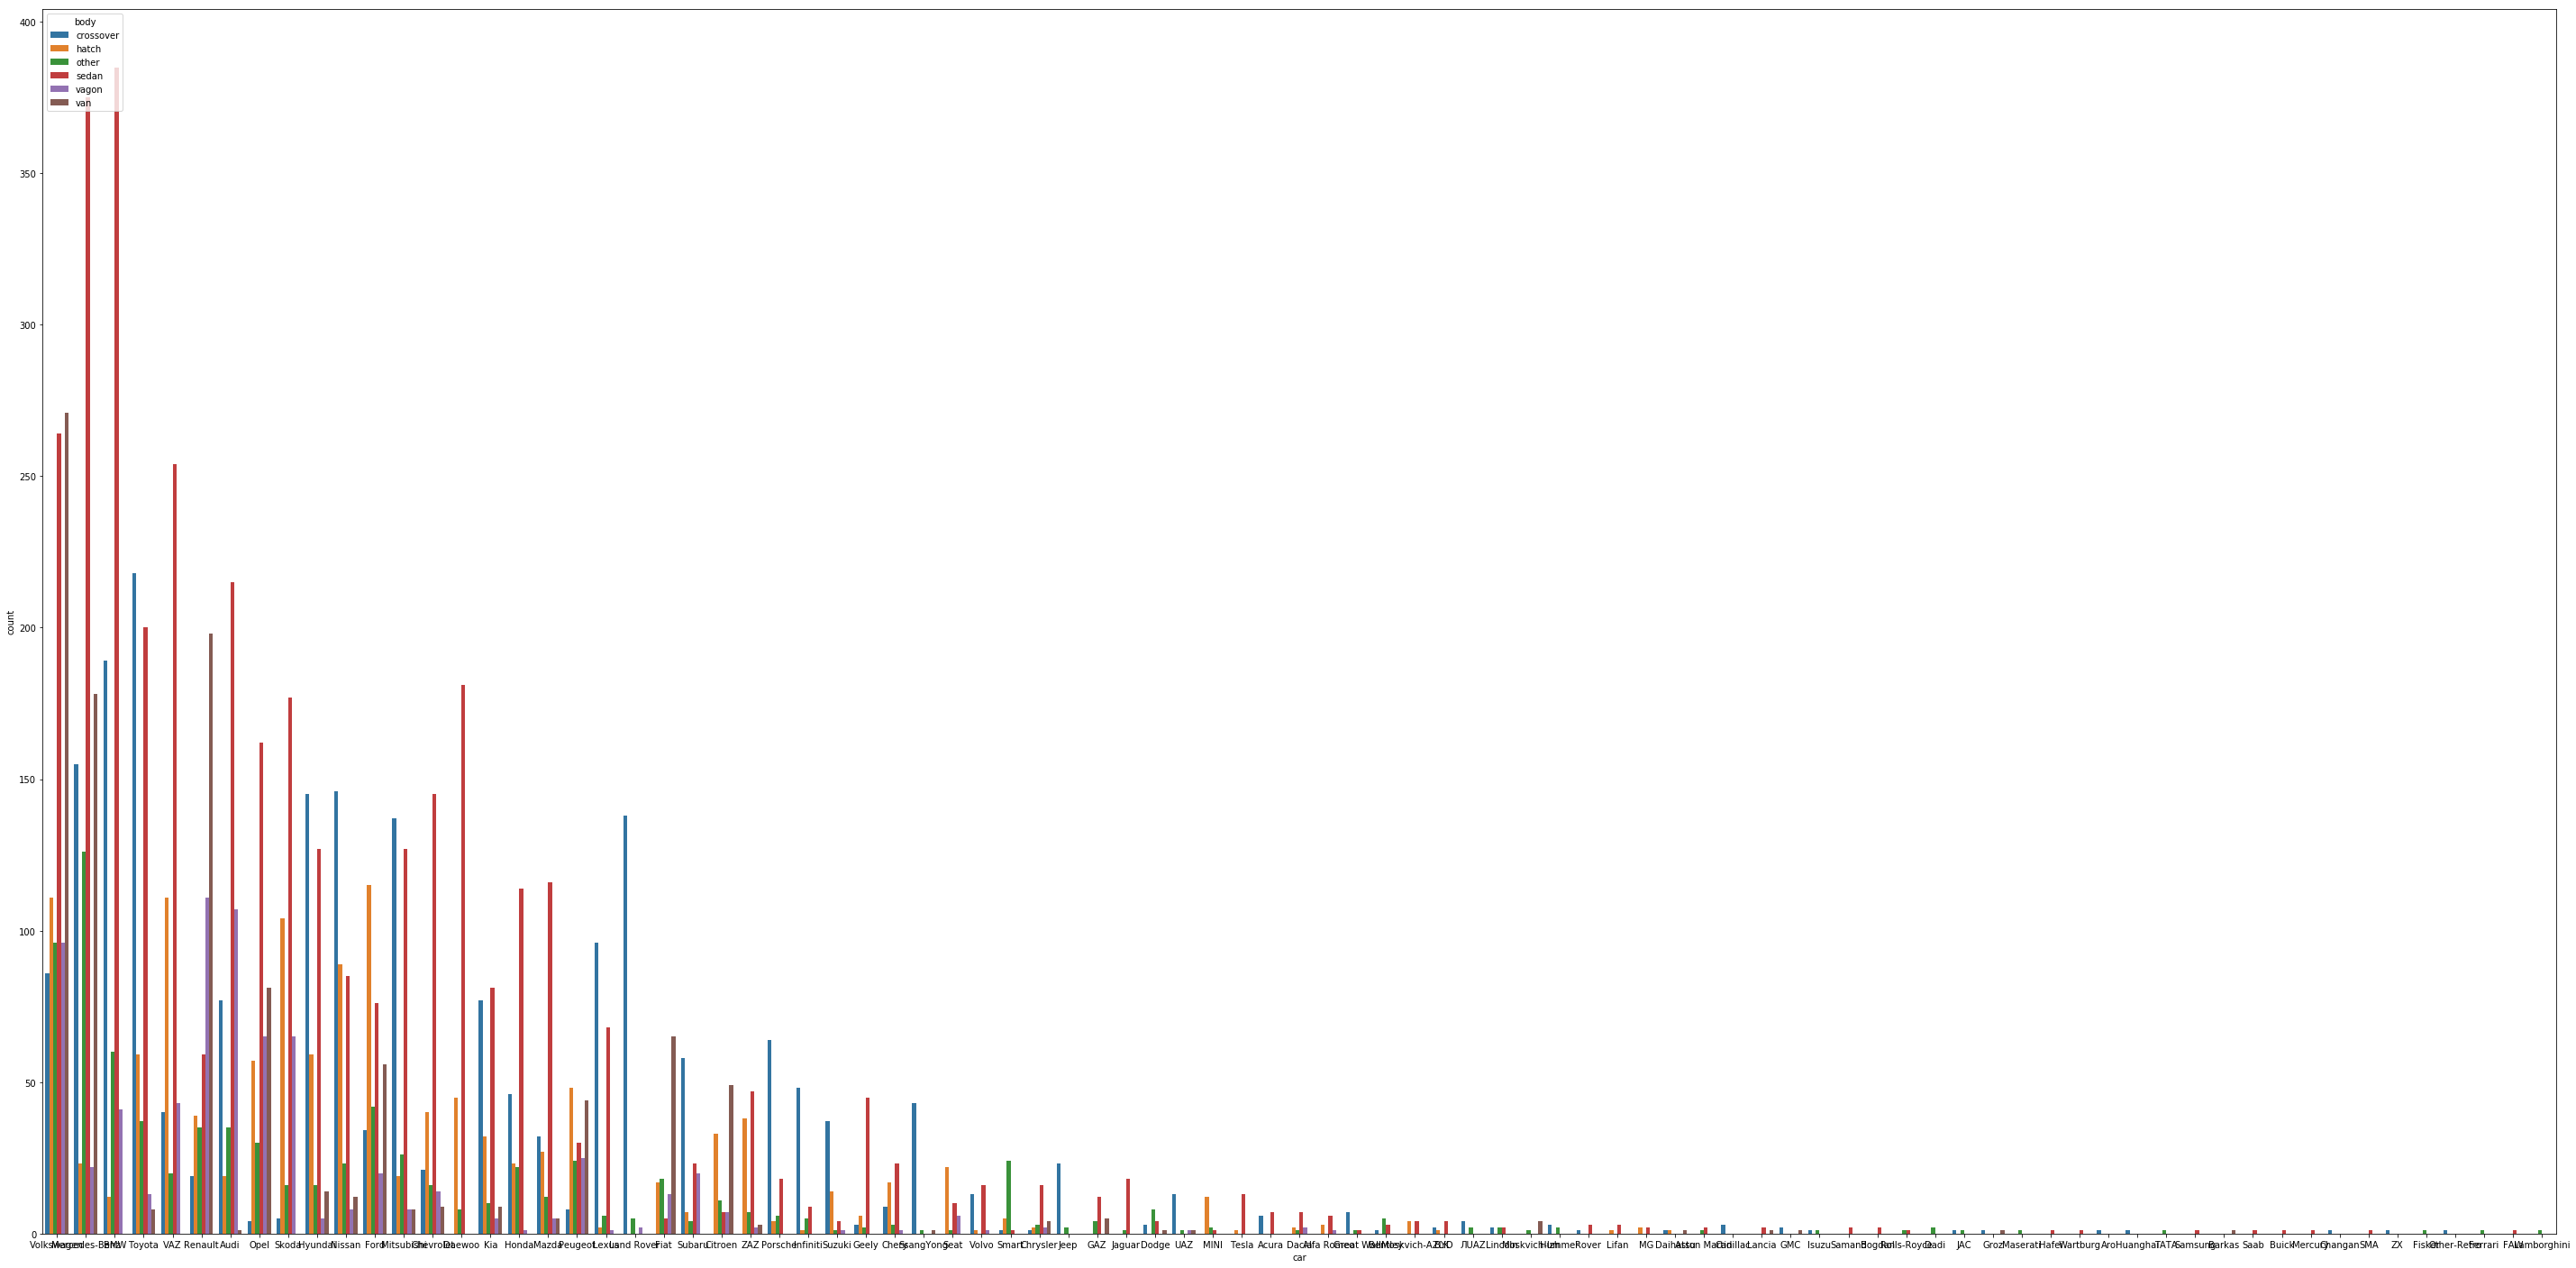

In [198]:
plt.figure(figsize = (50, 25))
sns.countplot(x='car', order=data['car'].value_counts().index, hue='body', data=data)

pass

# Обработка пропущенных значений

In [199]:
categorical_columns = [c for c in data.columns if (data[c].dtype.name != 'float64') & (data[c].dtype.name != 'int64')]
numerical_columns   = [c for c in data.columns if (data[c].dtype.name == 'int64') | (data[c].dtype.name == 'float64')]
print(categorical_columns)
print(numerical_columns)

['car', 'body', 'engType', 'registration', 'model', 'drive']
['price', 'mileage', 'engV', 'year']


In [200]:
data.isna().sum()

car               0
price             0
body              0
mileage           0
engV            419
engType           0
registration      0
year              0
model             0
drive           490
dtype: int64

In [201]:
data.median(axis = 0)

price      9299.0
mileage     128.0
engV          2.0
year       2008.0
dtype: float64

In [202]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [203]:
data[numerical_columns].count(axis = 0)

price      9369
mileage    9369
engV       9369
year       9369
dtype: int64

In [204]:
data[categorical_columns].count(axis = 0)

car             9369
body            9369
engType         9369
registration    9369
model           9369
drive           8879
dtype: int64

In [205]:
data['drive'].value_counts()

front    5137
full     2440
rear     1302
Name: drive, dtype: int64

In [206]:
data['drive'].describe().top

'front'

In [207]:
data['drive'] = data['drive'].fillna('front')

In [208]:
data['drive'].value_counts()

front    5627
full     2440
rear     1302
Name: drive, dtype: int64

In [209]:
data.describe(include=['category'])

,car,body,engType,registration,model,drive
count,9369,9369,9369,9369,9369,9369
unique,87,6,4,2,871,3
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,924,3572,4268,8816,196,5627


In [210]:
data['model'].value_counts()

E-Class                   196
A6                        170
Camry                     134
Vito пасс.                131
Lanos                     127
X5                        118
Octavia A5                107
Accord                     90
Megane                     88
Aveo                       80
520                        79
Land Cruiser Prado         76
Fabia                      75
Kangoo пасс.               72
Kangoo груз.               70
Touareg                    69
Tucson                     69
Accent                     68
Passat B6                  65
6                          64
Lacetti                    64
Range Rover                62
Caddy груз.                62
T5 (Transporter) пасс.     61
Superb                     61
Focus                      61
320                        61
Cayenne                    61
Polo                       60
Q7                         59
                         ... 
ML 550                      1
Bravo                       1
Boxer пасс

In [211]:
data = data.drop(['model'], axis = 1)

In [212]:
categorical_columns

['car', 'body', 'engType', 'registration', 'model', 'drive']

In [213]:
data.describe(include=['category'])

,car,body,engType,registration,drive
count,9369,9369,9369,9369,9369
unique,87,6,4,2,3
top,Volkswagen,sedan,Petrol,yes,front
freq,924,3572,4268,8816,5627


# Бинаризация

In [214]:
data['registration'] = pd.factorize(data['registration'])[0]

In [215]:
data['registration'].describe()

count    9369.000000
mean        0.059024
std         0.235683
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: registration, dtype: float64

In [216]:
body_dummies = pd.get_dummies(data['body'])

In [217]:
body_dummies.head()

,crossover,hatch,other,sedan,vagon,van
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [218]:
data = pd.concat((data, body_dummies), axis=1)
data = data.drop(['body'], axis=1)

In [219]:
data.head()

,car,price,mileage,engV,engType,registration,year,drive,crossover,hatch,other,sedan,vagon,van
0,Ford,15500.0,68,2.5,Gas,0,2010,full,1,0,0,0,0,0
1,Mercedes-Benz,20500.0,173,1.8,Gas,0,2011,rear,0,0,0,1,0,0
2,Mercedes-Benz,35000.0,135,5.5,Petrol,0,2008,rear,0,0,1,0,0,0
3,Mercedes-Benz,17800.0,162,1.8,Diesel,0,2012,front,0,0,0,0,0,1
4,Mercedes-Benz,33000.0,91,2.0,Other,0,2013,front,0,0,0,0,1,0


In [220]:
drive_dummies = pd.get_dummies(data['drive'])

In [221]:
drive_dummies.head()

,front,full,rear
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


In [222]:
data = pd.concat((data, drive_dummies), axis=1)
data = data.drop(['drive'], axis=1)

In [223]:
data.head()

,car,price,mileage,engV,engType,registration,year,crossover,hatch,other,sedan,vagon,van,front,full,rear
0,Ford,15500.0,68,2.5,Gas,0,2010,1,0,0,0,0,0,0,1,0
1,Mercedes-Benz,20500.0,173,1.8,Gas,0,2011,0,0,0,1,0,0,0,0,1
2,Mercedes-Benz,35000.0,135,5.5,Petrol,0,2008,0,0,1,0,0,0,0,0,1
3,Mercedes-Benz,17800.0,162,1.8,Diesel,0,2012,0,0,0,0,0,1,1,0,0
4,Mercedes-Benz,33000.0,91,2.0,Other,0,2013,0,0,0,0,1,0,1,0,0


In [224]:
engType_dummies = pd.get_dummies(data['engType'])

In [225]:
engType_dummies.head()

,Diesel,Gas,Other,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [226]:
data = pd.concat((data, engType_dummies), axis=1)
data = data.drop(['engType'], axis=1)

In [227]:
car_dummies = pd.get_dummies(data['car'])

In [228]:
data = pd.concat((data, car_dummies), axis=1)
data = data.drop(['car'], axis=1)

In [229]:
data.shape

(9369, 105)

In [230]:
data.head()

,price,mileage,engV,registration,year,crossover,hatch,other,sedan,vagon,...,Tesla,Toyota,UAZ,VAZ,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ЛUAZ
0,15500.0,68,2.5,0,2010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20500.0,173,1.8,0,2011,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,135,5.5,0,2008,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17800.0,162,1.8,0,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33000.0,91,2.0,0,2013,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Нормализация

In [231]:
data.loc[data['price'] < 40000, 'price'] = 1

In [233]:
data.loc[data['price'] >= 40000, 'price'] = 0

In [241]:
data.describe()

,price,mileage,engV,registration,year,crossover,hatch,other,sedan,vagon,...,Tesla,Toyota,UAZ,VAZ,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ЛUAZ
count,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,...,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.00000
mean,0.931369,137.118369,2.247294,0.059024,2006.763795,0.216565,0.131071,0.084748,0.381257,0.076209,...,0.001494,0.057103,0.001708,0.049952,0.098623,0.003309,0.000107,0.010353,0.000107,0.00064
std,0.252838,91.355915,1.030025,0.235683,6.656353,0.411926,0.337496,0.278521,0.485721,0.265346,...,0.038629,0.232052,0.041292,0.217857,0.298171,0.057430,0.010331,0.101228,0.010331,0.02530
min,0.000000,0.000000,0.800000,0.000000,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,70.000000,1.600000,0.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,128.000000,2.000000,0.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,193.000000,2.500000,0.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,470.000000,18.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [242]:
price = data['price']

In [243]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,price,mileage,engV,year
count,9369.000000,9369.000000,9369.000000,9369.000000
mean,0.931369,137.118369,2.247294,2006.763795
std,0.252838,91.355915,1.030025,6.656353
min,0.000000,0.000000,0.800000,1979.000000
25%,1.000000,70.000000,1.600000,2004.000000
50%,1.000000,128.000000,2.000000,2008.000000
75%,1.000000,193.000000,2.500000,2012.000000
max,1.000000,470.000000,18.000000,2016.000000


In [244]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [245]:
data_numerical.describe()

,price,mileage,engV,year
count,9.369000e+03,9.369000e+03,9.369000e+03,9.369000e+03
mean,7.500126e-15,7.298392e-17,1.276390e-14,-1.137225e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.683655e+00,-1.500925e+00,-1.405105e+00,-4.171022e+00
25%,2.714405e-01,-7.346910e-01,-6.284255e-01,-4.152117e-01
50%,2.714405e-01,-9.981148e-02,-2.400856e-01,1.857180e-01
75%,2.714405e-01,6.116914e-01,2.453393e-01,7.866477e-01
max,2.714405e-01,3.643788e+00,1.529351e+01,1.387577e+00


In [256]:
data.describe()

,price,mileage,engV,registration,year,crossover,hatch,other,sedan,vagon,...,Tesla,Toyota,UAZ,VAZ,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ЛUAZ
count,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,...,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.00000
mean,0.931369,137.118369,2.247294,0.059024,2006.763795,0.216565,0.131071,0.084748,0.381257,0.076209,...,0.001494,0.057103,0.001708,0.049952,0.098623,0.003309,0.000107,0.010353,0.000107,0.00064
std,0.252838,91.355915,1.030025,0.235683,6.656353,0.411926,0.337496,0.278521,0.485721,0.265346,...,0.038629,0.232052,0.041292,0.217857,0.298171,0.057430,0.010331,0.101228,0.010331,0.02530
min,0.000000,0.000000,0.800000,0.000000,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,70.000000,1.600000,0.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,128.000000,2.000000,0.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,193.000000,2.500000,0.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,470.000000,18.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [262]:
data1 = data.drop(['price', 'year', 'mileage', 'engV'], axis=1)
data1

,registration,crossover,hatch,other,sedan,vagon,van,front,full,rear,...,Tesla,Toyota,UAZ,VAZ,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ЛUAZ
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [263]:
data1 = pd.concat((data1, data_numerical), axis=1)
data1.describe()

,registration,crossover,hatch,other,sedan,vagon,van,front,full,rear,...,Volkswagen,Volvo,Wartburg,ZAZ,ZX,ЛUAZ,price,mileage,engV,year
count,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,...,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.00000,9.369000e+03,9.369000e+03,9.369000e+03,9.369000e+03
mean,0.059024,0.216565,0.131071,0.084748,0.381257,0.076209,0.110150,0.600598,0.260433,0.138969,...,0.098623,0.003309,0.000107,0.010353,0.000107,0.00064,7.500126e-15,7.298392e-17,1.276390e-14,-1.137225e-14
std,0.235683,0.411926,0.337496,0.278521,0.485721,0.265346,0.313094,0.489802,0.438894,0.345933,...,0.298171,0.057430,0.010331,0.101228,0.010331,0.02530,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-3.683655e+00,-1.500925e+00,-1.405105e+00,-4.171022e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.714405e-01,-7.346910e-01,-6.284255e-01,-4.152117e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.714405e-01,-9.981148e-02,-2.400856e-01,1.857180e-01
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.714405e-01,6.116914e-01,2.453393e-01,7.866477e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.714405e-01,3.643788e+00,1.529351e+01,1.387577e+00


## Выделим X и Y

In [294]:
X = data1.drop('price', axis = 1) # выбрасываем столбец 'class'
y = np.array(price)
feature_names = X.columns

In [296]:
type(feature_names)

pandas.core.indexes.base.Index

In [297]:
feature_names

Index(['registration', 'crossover', 'hatch', 'other', 'sedan', 'vagon', 'van',
       'front', 'full', 'rear',
       ...
       'VAZ', 'Volkswagen', 'Volvo', 'Wartburg', 'ZAZ', 'ZX', 'ЛUAZ',
       'mileage', 'engV', 'year'],
      dtype='object', length=104)

In [298]:
X = X.to_numpy()

In [299]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [300]:
print(X.shape)
print(y.shape)
N, d = X.shape

(9369, 104)
(9369,)


In [301]:
type(X)

numpy.ndarray

In [302]:
type(y)

numpy.ndarray

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6558 2811


# kNN

In [366]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [367]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [368]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [369]:
err_test

0.038776236214870155

In [370]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 146   56]
 [  53 2556]]


Было использовано несколько значений, вследствие чего обнаружено, что ошибка меньше при малом количестве соседей. Подберем такой параметр, при котором ошибка будет минимальна.

## Подбор параметров

In [360]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.036596523330283626 3


In [361]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.02058554437328454 0.03593027392387051


В целом можно сказать, что в данной задаче метод показывает себя хорошо, величина ошибки мала, переобучения не наблюдается. 